<a href="https://colab.research.google.com/github/Nikitha14-code/LLM-MODEL-ASSIGNMENT/blob/main/22007583_LLM_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [1]:
pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.6.1
    Uninstalling fsspec-2024.6.1:
      Successfully uninstalled fsspec-2024.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requir

In [2]:
# Importing Libraries
from datasets import load_dataset
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

# **Dataset**

In [28]:
# Load the dataset
Emotion = load_dataset("dair-ai/emotion")

In [29]:
# Printing the dataset
print(Emotion)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


# **Data description**

In [30]:
# Convert the data splits into DataFrames
train_emotion_df = pd.DataFrame(data=Emotion['train'])
validation_emotion_df = pd.DataFrame(data=Emotion['validation'])
test_emotion_df = pd.DataFrame(data=Emotion['test'])

In [31]:
# Display the first few rows of each DataFrame
print("Training Set Samples:")
print(train_emotion_df.head())

print("\nValidation Set Samples:")
print(validation_emotion_df.head())

print("\nTest Set Samples:")
print(test_emotion_df.head())

Training Set Samples:
                                                text  label
0                            i didnt feel humiliated      0
1  i can go from feeling so hopeless to so damned...      0
2   im grabbing a minute to post i feel greedy wrong      3
3  i am ever feeling nostalgic about the fireplac...      2
4                               i am feeling grouchy      3

Validation Set Samples:
                                                text  label
0  im feeling quite sad and sorry for myself but ...      0
1  i feel like i am still looking at a blank canv...      0
2                     i feel like a faithful servant      2
3                  i am just feeling cranky and blue      3
4  i can have for a treat or if i am feeling festive      1

Test Set Samples:
                                                text  label
0  im feeling rather rotten so im not very ambiti...      0
1          im updating my blog because i feel shitty      0
2  i never make her separate from 

In [32]:
# Assuming 'label' is the column name
print("\nLabel Distribution in Training Set:")
print(train_emotion_df['label'].value_counts())


Label Distribution in Training Set:
label
1    5362
0    4666
3    2159
4    1937
2    1304
5     572
Name: count, dtype: int64


In [33]:
# Display the distribution of labels in the validation set
print("\nLabel Distribution in validation Set:")
print(validation_emotion_df['label'].value_counts())


Label Distribution in validation Set:
label
1    704
0    550
3    275
4    212
2    178
5     81
Name: count, dtype: int64


In [34]:
# Display the distribution of labels in the testing set
print("\nLabel Distribution in Testing Set:")
print(test_emotion_df['label'].value_counts())


Label Distribution in Testing Set:
label
1    695
0    581
3    275
4    224
2    159
5     66
Name: count, dtype: int64


# **Exploratory Data Analysis(EDA)**

In [10]:
def plot_label_distribution(df, title):
    # Create a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

    # Calculate label counts and percentages
    label_counts = df['label'].value_counts()
    label_percentages = df['label'].value_counts(normalize=True) * 100

    # Bar plot setup
    axes[0].set_title(f"{title} - Frequency")
    axes[0].set_xlabel("Emotion Categories")
    axes[0].set_ylabel("Number of Entries")
    label_counts.plot.bar(ax=axes[0], color='cyan')
    axes[0].tick_params(axis='x', labelrotation=45, labelright=True)


    # Pie chart setup
    axes[1].set_title(f'{title} - Proportion')
    label_percentages.plot.pie(autopct='%1.1f%%', startangle=140, ax=axes[1], colors=['cyan', 'magenta', 'yellow'])
    axes[1].set_ylabel('')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

    # Return DataFrame with counts and percentages
    return pd.DataFrame({'Count': label_counts, 'Percentage': label_percentages})

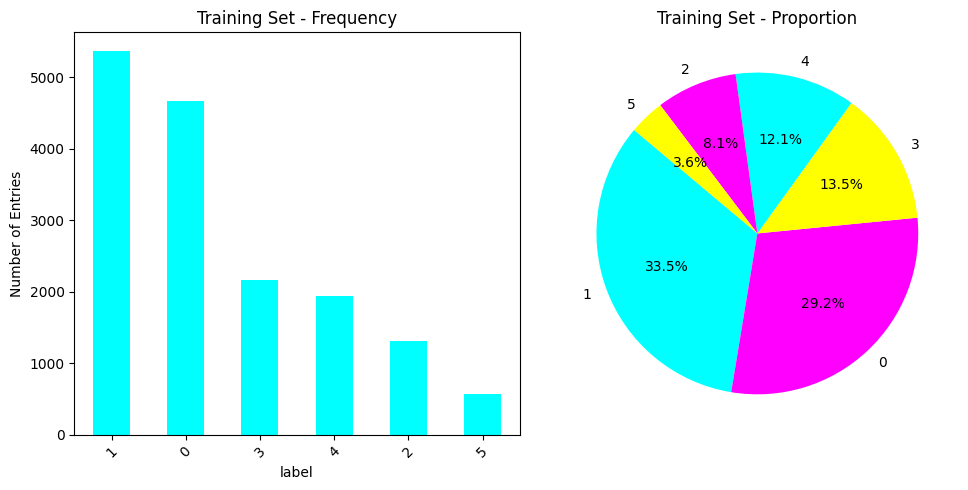

       Count  Percentage
label                   
1       5362    33.51250
0       4666    29.16250
3       2159    13.49375
4       1937    12.10625
2       1304     8.15000
5        572     3.57500


In [11]:
# Plot label breakdown for the training set
train_label_details = plot_label_distribution(train_df, 'Training Set')
print(train_label_details)

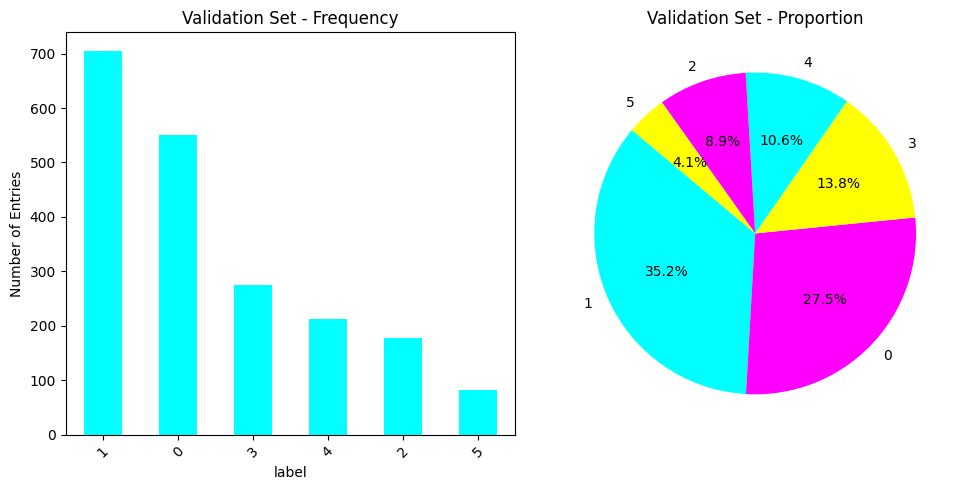

       Count  Percentage
label                   
1        704       35.20
0        550       27.50
3        275       13.75
4        212       10.60
2        178        8.90
5         81        4.05


In [12]:
# Plot label breakdown for the validation set
validation_label_details = plot_label_distribution(validation_df, 'Validation Set')
print(validation_label_details)

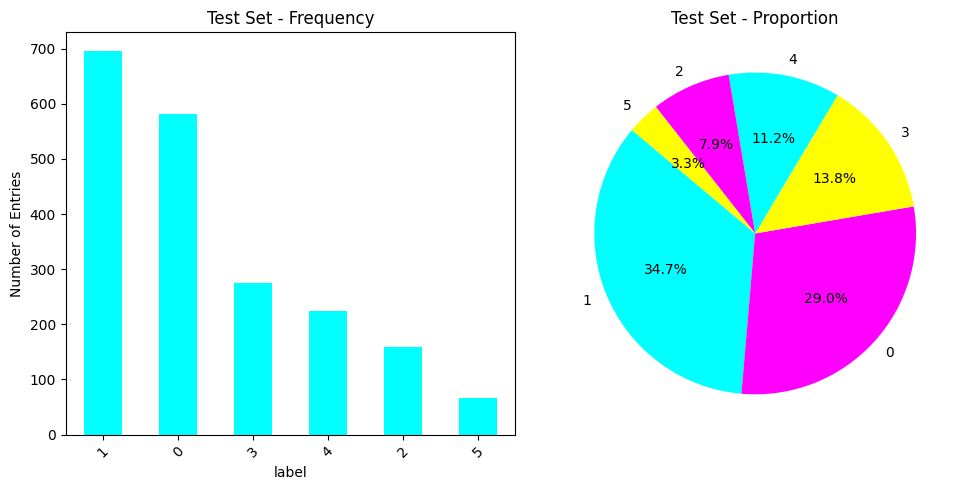

       Count  Percentage
label                   
1        695       34.75
0        581       29.05
3        275       13.75
4        224       11.20
2        159        7.95
5         66        3.30


In [13]:
# Plot label breakdown for the test set
test_label_details = plot_label_distribution(test_df, 'Test Set')
print(test_label_details)

# **Tokenizing dataset**

In [14]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [15]:
# Function to tokenize the dataset
def tokenize_data(samples):
    return tokenizer(samples['text'], padding='max_length', truncation=True)

# Tokenize the text data
train_tokens = tokenizer(train_df['text'].values.tolist(), truncation=True, padding=True, max_length=128)
val_tokens = tokenizer(validation_df['text'].values.tolist(), truncation=True, padding=True, max_length=128)
test_tokens = tokenizer(test_df['text'].values.tolist(), truncation=True, padding=True, max_length=128)

# Retrieve labels
train_labels = list(train_df['label'].values)
val_labels = list(validation_df['label'].values)
test_labels = list(test_df['label'].values)

In [16]:
# Function to create datasets using TensorFlow
def generate_tf_dataset(tokenized_data, labels):
    dataset = tf.data.Dataset.from_tensor_slices((dict(tokenized_data), labels))
    return dataset.batch(64)

# Create TensorFlow datasets for training, validation, and testing
train_dataset = generate_tf_dataset(train_tokens, train_labels)
val_dataset = generate_tf_dataset(val_tokens, val_labels)
test_dataset = generate_tf_dataset(test_tokens, test_labels)

In [17]:
# Custom BERT-based classification model
class CustomBERTClassifier(tf.keras.Model):
    def __init__(self, bert_model, num_classes):
        super(CustomBERTClassifier, self).__init__()
        self.bert_layer = bert_model
        self.classification_layer = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        # Extract relevant inputs
        input_ids = inputs.get('input_ids')
        attention_mask = inputs.get('attention_mask')
        token_type_ids = inputs.get('token_type_ids')

        # Pass inputs through BERT model
        bert_outputs = self.bert_layer(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

        # Use the [CLS] token's output for classification
        cls_token_output = bert_outputs.last_hidden_state[:, 0, :]

        # Pass through the dense layer for classification
        return self.classification_layer(cls_token_output)


# **Loading BERT Model**

In [18]:
# Load the pre-trained model
pretrained_bert = TFBertModel.from_pretrained('bert-base-uncased')

# Define the number of output classes
output_classes = 6

# Instantiate the classification model
classification_model = CustomBERTClassifier(pretrained_bert, output_classes)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

# **Fine-Tuning the model**

In [19]:
# Compile the model for training
classification_model.compile(
     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

# Training
model_history = classification_model.fit(
    train_dataset,
    epochs=8,
    validation_data=val_dataset
)

Epoch 1/8


250/250 [==============================] - 309s 1s/step - loss: 0.8615 - accuracy: 0.6858 - val_loss: 0.3225 - val_accuracy: 0.8905
Epoch 2/8
250/250 [==============================] - 270s 1s/step - loss: 0.2296 - accuracy: 0.9141 - val_loss: 0.1900 - val_accuracy: 0.9250
Epoch 3/8
250/250 [==============================] - 270s 1s/step - loss: 0.1392 - accuracy: 0.9400 - val_loss: 0.1743 - val_accuracy: 0.9325
Epoch 4/8
250/250 [==============================] - 270s 1s/step - loss: 0.1090 - accuracy: 0.9523 - val_loss: 0.1768 - val_accuracy: 0.9300
Epoch 5/8
250/250 [==============================] - 270s 1s/step - loss: 0.0921 - accuracy: 0.9591 - val_loss: 0.1725 - val_accuracy: 0.9370
Epoch 6/8
250/250 [==============================] - 270s 1s/step - loss: 0.0771 - accuracy: 0.9649 - val_loss: 0.1760 - val_accuracy: 0.9355
Epoch 7/8
250/250 [==============================] - 271s 1s/step - loss: 0.0663 - accuracy: 0.9705 - val_loss: 0.2075 - val_accuracy: 0.9340
Epoch 8/8
250/25

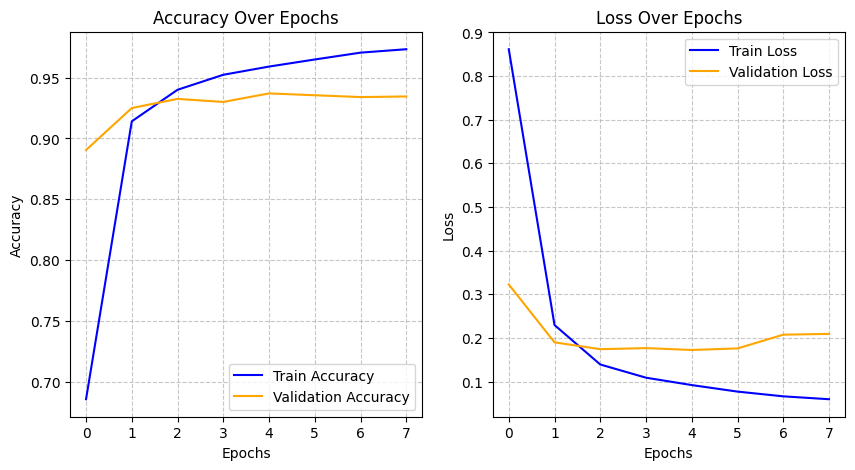

In [20]:
# Plot accuracy and loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(model_history.history['loss'], label='Train Loss', color='blue')
plt.plot(model_history.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

# **Accuracy**

In [21]:
# Model performance on the test data
test_loss, test_accuracy = classification_model.evaluate(test_dataset)
print(f"Loss on Test Data: {test_loss}")
print(f"Accuracy on Test Data: {test_accuracy}")

32/32 [==============================] - 13s 275ms/step - loss: 0.2131 - accuracy: 0.9265
Loss on Test Data: 0.2131146341562271
Accuracy on Test Data: 0.9265000224113464


# **Predictions**

In [22]:
# Generate predictions on the test data
model_predictions = classification_model.predict(test_dataset)
predicted_classes = tf.math.argmax(model_predictions, axis=-1)

# Display the predicted and true labels
print("Predicted Classes:", predicted_classes)
print("Actual Labels:", test_labels)

32/32 [==============================] - 12s 272ms/step
Predicted Classes: tf.Tensor([0 0 0 ... 1 1 4], shape=(2000,), dtype=int64)
Actual Labels: [0, 0, 0, 1, 0, 4, 3, 1, 1, 3, 4, 0, 4, 1, 2, 0, 1, 0, 3, 1, 0, 1, 1, 0, 0, 4, 3, 0, 4, 3, 4, 3, 0, 3, 0, 1, 1, 0, 1, 1, 3, 0, 1, 0, 1, 3, 1, 1, 4, 4, 0, 4, 1, 0, 1, 0, 0, 1, 0, 3, 0, 0, 1, 1, 0, 5, 0, 3, 4, 5, 1, 2, 5, 1, 2, 3, 1, 0, 1, 2, 1, 3, 0, 1, 0, 0, 1, 1, 1, 0, 1, 4, 3, 4, 3, 3, 2, 0, 3, 0, 0, 0, 0, 4, 3, 3, 1, 1, 4, 0, 1, 2, 4, 1, 0, 1, 1, 4, 0, 1, 0, 1, 0, 3, 0, 2, 0, 4, 0, 0, 1, 2, 0, 3, 3, 1, 4, 3, 0, 1, 1, 0, 4, 1, 1, 0, 1, 4, 4, 2, 0, 2, 5, 0, 1, 0, 1, 1, 3, 0, 3, 3, 1, 4, 4, 1, 2, 2, 2, 0, 2, 3, 1, 1, 0, 3, 1, 1, 0, 0, 4, 1, 0, 2, 4, 0, 1, 1, 4, 3, 1, 0, 1, 3, 0, 0, 4, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 4, 4, 1, 3, 0, 1, 4, 1, 0, 3, 0, 3, 3, 1, 4, 5, 1, 1, 1, 3, 1, 2, 4, 0, 0, 1, 1, 4, 1, 0, 1, 0, 1, 0, 2, 4, 1, 0, 0, 0, 3, 1, 5, 0, 0, 0, 3, 2, 0, 1, 1, 0, 3, 3, 3, 1, 3, 3, 2, 1, 1, 3, 0, 3, 3, 4, 0, 3, 0, 1, 4, 3, 0, 1, 0, 0, 1, 

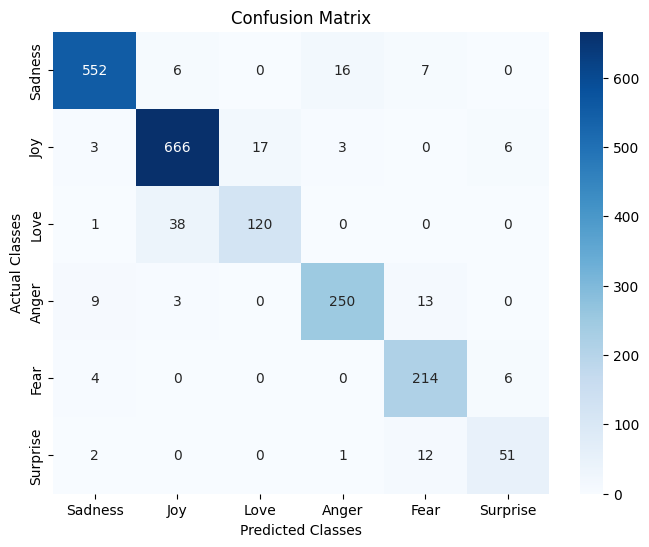

In [27]:
# Define a dictionary for label names
label_names = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)

# Create a list of label names for the confusion matrix
label_list = [label_names[i] for i in range(len(label_names))]

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)

# Add labels and title to the plot
plt.xlabel('Predicted Classes')
plt.ylabel('Actual Classes')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Generate the classification report
class_report = classification_report(test_labels, predicted_classes, target_names=label_list)

# Display the classification report
print("\nDetailed Classification Report:\n")
print(class_report)


Detailed Classification Report:

              precision    recall  f1-score   support

     Sadness       0.97      0.95      0.96       581
         Joy       0.93      0.96      0.95       695
        Love       0.88      0.75      0.81       159
       Anger       0.93      0.91      0.92       275
        Fear       0.87      0.96      0.91       224
    Surprise       0.81      0.77      0.79        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.89      2000
weighted avg       0.93      0.93      0.93      2000



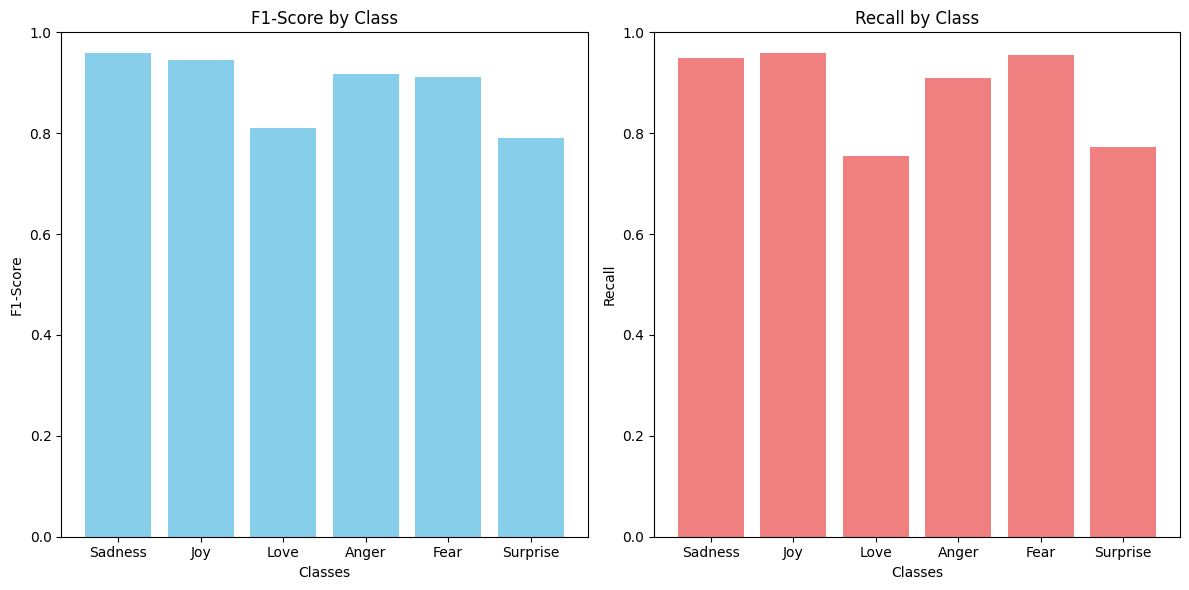

In [25]:
# Compute F1-score and recall for each class
f1_per_class = f1_score(test_labels, predicted_classes, average=None)
recall_per_class = recall_score(test_labels, predicted_classes, average=None)

# Set up the plotting area
plt.figure(figsize=(12, 6))

# Plot the F1-scores
plt.subplot(1, 2, 1)
plt.bar(label_list, f1_per_class, color='skyblue')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('F1-Score by Class')
plt.ylim(0, 1)

# Plot the recall scores
plt.subplot(1, 2, 2)
plt.bar(label_list, recall_per_class, color='lightcoral')
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.ylim(0, 1)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

# **Example predictions**

In [26]:
# Display 5 sample predictions
sample_indices = [0, 1, 2, 3, 4]
for idx in sample_indices:
    print(f"Sample {idx + 1}:")
    print(f"Text: {test_df['text'].iloc[idx]}")
    print(f"Actual Label: {test_labels[idx]}")
    print(f"Predicted Label: {predicted_classes[idx]}")
    print()

Sample 1:
Text: im feeling rather rotten so im not very ambitious right now
Actual Label: 0
Predicted Label: 0

Sample 2:
Text: im updating my blog because i feel shitty
Actual Label: 0
Predicted Label: 0

Sample 3:
Text: i never make her separate from me because i don t ever want her to feel like i m ashamed with her
Actual Label: 0
Predicted Label: 0

Sample 4:
Text: i left with my bouquet of red and yellow tulips under my arm feeling slightly more optimistic than when i arrived
Actual Label: 1
Predicted Label: 1

Sample 5:
Text: i was feeling a little vain when i did this one
Actual Label: 0
Predicted Label: 0

